In [1]:
from coal_mapper_dataset import *
from coal_mapper import *
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import plotly_express as px

In [2]:
eiadf = EIA_dataset("2020")
alldf = dataset_addOn(eiadf)
alldf = alldf.rename(columns={'Average Unit Age (years)': 'AverageAge'})

['eGRID2012_Data.xlsx', '.DS_Store', 'egrid2019_data.xlsx', 'egrid2020_data.xlsx', 'eGRID2010_Data.xls', 'egrid2018_data_v2.xlsx', 'eGRID2009_data.xls', 'egrid2016_data.xlsx', 'eGRID2014_Data_v2.xlsx', 'eGRID2005_plant.xls']
['eGRID2012_Data.xlsx', 'egrid2019_data.xlsx', 'egrid2020_data.xlsx', 'eGRID2010_Data.xls', 'egrid2018_data_v2.xlsx', 'eGRID2009_data.xls', 'egrid2016_data.xlsx', 'eGRID2014_Data_v2.xlsx', 'eGRID2005_plant.xls']


/Users/gathrid/Documents/THESIS/coal-TDA/coal_mapper_dataset.py:246: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  retrodf = retrodf.groupby('ORISPL')['post2004RetrofitCosts', 'post2004Retrofit'].sum().reset_index()
/Users/gathrid/Documents/THESIS/coal-TDA/coal_mapper_dataset.py:348: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageDF['GENYRRET'] = ageDF['GENYRRET'].apply(resetGENYRRET)


In [61]:
# gen = pd.read_excel('egrid 2005-2020/egrid2020_data.xlsx', 'GEN20', header = 1).reset_index()
# indivL = gen['ORISPL'].tolist()
# plantL = alldf['ORISPL'].tolist() ####to Edit
# gen_list = []
# gen2 = gen
# count = 0
# for x in indivL:
#     if x in plantL:
#         count +=1
#         gen_list.append(x)
# gen2 = gen2[gen2['ORISPL'].isin(gen_list)]
# # In[16]:
# def removeNonCoal(gen2):
#     gen2 = gen2[(gen2.FUELG1 != 'WND') & (gen2.FUELG1 != 'WDS') & (gen2.FUELG1 != 'WAT') & (gen2.FUELG1 != 'SUN') & (gen2.FUELG1 != 'RFO') & (gen2.FUELG1 != 'NG') & (gen2.FUELG1 != 'JF') & (gen2.FUELG1 != 'DFO') & (gen2.FUELG1 != 'NUC') & (gen2.FUELG1 != 'BLQ') ]
#     return gen2
# gen2 = removeNonCoal(gen2)

# gen2 = gen2[gen2['GENYRRET']<=2030]
# gen2 = gen2[gen2['GENYRRET']>2020]
# gen2 = gen2[['ORISPL', 'GENYRRET']]
# tot = alldf.merge(gen2, how='left', left_on='ORISPL', right_on='ORISPL')

# def plannedRet (id):
#     if id > 2020:
#         return 1
#     else:
#         return 0

# tot['ret'] = tot['GENYRRET'].apply(plannedRet)
# tot = tot.groupby('ORISPL').mean().reset_index()



In [ ]:
whole = EIA_dataset("whole")
whole['Year'] = whole['Year'].astype(int)
whole = whole[whole['Year']>2016]
whole = whole.groupby('ORISPL').mean().reset_index()
test = ORISPLmerge(alldf, whole[['ORISPL', 'PLNGENAN']])

In [ ]:
fig = px.scatter(data_frame=test, x = 'PLNGENAN_x', y='PLNGENAN_y', hover_name='label', color='SECTOR')
fig.update_layout(xaxis_title="2020 Generation", yaxis_title="2005-2020 Average Generation")
fig

In [3]:
def merge_age(GENYRONL, AverageAge):
    if AverageAge < 5:
        if GENYRONL == 1:
            return 0
        else:
            return 2020 - GENYRONL
    else:
        return AverageAge

In [4]:
alldf['_merge'] = alldf['_merge'].astype(str)
alldf['ORISPL'] = alldf['ORISPL'].astype(int)

In [5]:
import statsmodels.api as sm

pret = alldf[alldf['AverageAge']>1]

# defining the dependent and independent variables
Xtrain = pret[['PLGENACL', 'AverageAge', 'forwardCosts','PLNOXAN', 'PLSO2AN', 'popWithin3miles', 'percDemographicIndex', 'PM_emissions', 'impact_score', 'numRetiredGenerators']]
ytrain = pret[['post2004Retrofit']]

# building the model and fitting the data
log_reg = sm.RLM(ytrain, Xtrain).fit()
    #log_reg = sm.Logit(ytrain, Xtrain).fit()

print(log_reg.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:       post2004Retrofit   No. Observations:                  216
Model:                            RLM   Df Residuals:                      206
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 24 Aug 2022                                         
Time:                        17:19:39                                         
No. Iterations:                    28                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
PLGENACL              6.626e-07 

In [6]:
import statsmodels.api as sm

pret = alldf[alldf['AverageAge']>1]

# defining the dependent and independent variables
Xtrain = pret[['PLGENACL', 'AverageAge', 'forwardCosts','PLNOXAN', 'PLSO2AN', 'popWithin3miles', 'percDemographicIndex', 'PM_emissions', 'impact_score', 'numRetiredGenerators']]
ytrain = pret[['post2004RetrofitCosts']]

# building the model and fitting the data
log_reg = sm.OLS(ytrain, Xtrain).fit()
    #log_reg = sm.Logit(ytrain, Xtrain).fit()

print(log_reg.summary())

                                  OLS Regression Results                                  
Dep. Variable:     post2004RetrofitCosts   R-squared (uncentered):                   0.484
Model:                               OLS   Adj. R-squared (uncentered):              0.459
Method:                    Least Squares   F-statistic:                              19.32
Date:                   Wed, 24 Aug 2022   Prob (F-statistic):                    7.51e-25
Time:                           17:19:40   Log-Likelihood:                         -4537.3
No. Observations:                    216   AIC:                                      9095.
Df Residuals:                        206   BIC:                                      9128.
Df Model:                             10                                                  
Covariance Type:               nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-

<ipython-input-7-d07ec605997b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mapdf = (alldf.groupby('SECTOR')['GENNTAN', 'PLSO2AN', 'popWithin3miles', 'numPlants'].sum()/alldf[['GENNTAN', 'PLSO2AN', 'popWithin3miles', 'numPlants']].sum()).sort_values('GENNTAN')*100


Text(0.5, 1.0, 'Contribution to Total Coal Impacts')

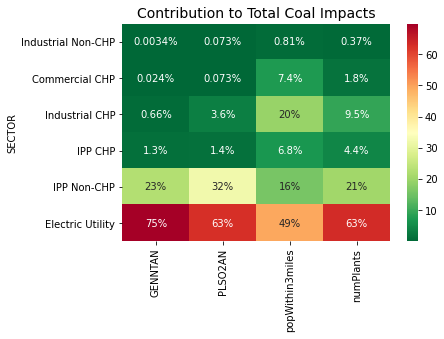

In [7]:
alldf['numPlants']=1
mapdf = (alldf.groupby('SECTOR')['GENNTAN', 'PLSO2AN', 'popWithin3miles', 'numPlants'].sum()/alldf[['GENNTAN', 'PLSO2AN', 'popWithin3miles', 'numPlants']].sum()).sort_values('GENNTAN')*100
ax = sns.heatmap(mapdf, annot=True, robust=True, cmap = 'RdYlGn_r')
for t in ax.texts: t.set_text(t.get_text() + "%")
plt.title('Contribution to Total Coal Impacts', fontsize =14)

In [8]:
alldf.groupby('SECTOR')['ORISPL'].count()

SECTOR
Commercial CHP          5
Electric Utility      173
IPP CHP                12
IPP Non-CHP            56
Industrial CHP         26
Industrial Non-CHP      1
Name: ORISPL, dtype: int64

In [9]:
my_colorscale = [[0.0, '#001219'],
             [0.1, '#005f73'],
             [0.2, '#0a9396'],
             [0.3, '#94d2bd'],
             [0.4, '#e9d8a6'],
             [0.5, '#ee9b00'],
             [0.6, '#ca6702'],
             [0.7, '#bb3e03'],
             [0.8, '#ae2012'],
             [0.9, '#9b2226'],
             [1.0, '#a50026']]  

In [10]:

fig = px.scatter(data_frame=alldf[alldf['forwardCosts']<100], 
    x='PLGENACL', 
    y='forwardCosts', 
    hover_name='label', 
    hover_data=['CAPFAC', 'AverageAge', 'impact_score'], 
    color='forwardCosts', 
    size=alldf[alldf['forwardCosts']<100]['CAPFAC']**3, 
    color_continuous_scale=my_colorscale,
    title='Generation vs Cost – Sized by Capacity Factor')

fig.update_traces(
    marker=dict(opacity = 0.9, line=dict(color='black', width = 0.3)))
fig.update_layout(
    font = dict(size=9))

In [11]:
df = alldf#[alldf['LCOE']>0]
df=df.fillna(0)
df['AverageAge'] = df.apply(lambda x: merge_age(x.GENYRONL, x.AverageAge), axis=1)
def reduceLCOE(id):
       if id>100:
              return 100
       else:
              return id

df['forwardCosts'] = df['forwardCosts'].apply(reduceLCOE)

df1 = df
df2 = (df[['PLGENACL', 'CAPFAC', 'PLSO2AN', 'post2004RetrofitCosts', 'AverageAge', 'CO2limitsOppose', 'affectedDemographicIndex', 'forwardCosts', 'impact_score']])
df3 = df[['PLGENACL', 'CAPFAC', 'PLSO2AN', 'post2004RetrofitCosts', 'AverageAge', 'CO2limitsOppose', 'affectedDemographicIndex', 'forwardCosts', 
       'PLCO2AN', 'PLNOXAN', 'CarbonIntensity', 'post2004Retrofit', 'PartiallyRetired', 'popWithin3miles', 'percDemographicIndex', 'PM_emissions',
       'pop_level', 'CAP_level', 'impact_score']]

mapper = km.KeplerMapper(verbose=0)
scaler = StandardScaler()
data = scaler.fit_transform(df2)


projected_data = mapper.fit_transform(data, projection=sklearn.manifold.TSNE(random_state=26779))
#projected_data = mapper.fit_transform(data, projection=umap.UMAP(n_components=2, random_state=22))

In [12]:
###cluster creation:
# cubes = 6
# overlap = 0.4
# clusters = 5

###super-cluster creation
cubes = 6
overlap = 0.4
clusters = 5

colors = df3
labels = mapper_labels(df1['label'])

graph_new = mapper.map(
    projected_data,
    remove_duplicate_nodes=False,
    cover=km.Cover(n_cubes=cubes, perc_overlap=overlap),
    clusterer=sklearn.cluster.KMeans(n_clusters=clusters, random_state=334))

mapper.visualize(
    graph_new,
    path_html="lenses_LCOE_test.html",
    title="US Coal Plant Set (" +str(cubes)+ " cubes at " +str(overlap*100) + "% overlap) with Plant Labels",
    custom_tooltips=labels,
    color_values = colors,
    colorscale=my_colorscale,
    color_function_name=list(df3.columns),
    node_color_function=['mean', 'median', 'max', 'min', 'std'],
    include_searchbar = True, 
    #include_intersection_selector= True
)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>US Coal Plant Set (6 cubes at 40.0% overlap) with Plant Labels | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: upperc

In [13]:
#Functions to select Groupings – MUST RUN!

########
# HELP #
########

def nodeContains(node:str, df:pd.DataFrame):
    '''
    returns a dataframe of the power plants contained within a simplicial_complex node
    
    node : the cubeX_clusterY node name
    df : the dataframe used to make the mapper graph and graph_new
    '''
    
    list = graph_new['nodes'][node]
    outDF = pd.DataFrame()

    for i in list:
        temp = df.iloc[[int(i)]]
        outDF = outDF.append(temp)

    return outDF

## requires graph_new to be defined: graph_new = mapper.map(...)

df = pd.DataFrame(graph_new['simplices'], columns = ['Link', 'Linked']).fillna(0)
df = df[df['Linked']!=0].reset_index()

def links(l):
    '''
    returns a list of all directional connections in graph_new['Links']
    this indicates uni-directional connections, but it not comprehensive

    l - a cubeX_clusterY node ID
    '''
    for i in range(0, len(df)):
        temp1 = df['Link'][i]
        temp2 = df['Linked'][i]
        if temp1 in l:
            if temp2 not in l:
                l.append(temp2)
        if temp1 not in l:
            if temp2 in l:
                l.append(temp1)
    return l

def running(inL:list):
    '''
    recursive method returning a list of all connected nodeIDs

    inL should be a singular node in list form
    with the goal of being easy to use
    '''
    templ = links(inL)
    tempp = links(templ)
    while (len(templ) != len(tempp)):
        return running(tempp)
    
    print(str(len(tempp)) + " nodes")
    return tempp


########
# MAIN #
########

def clusterDF(list1:list, alldf:pd.DataFrame):
    '''
    returns a dataFrame of all coal plants in a cluster (defined by links)

    inL - should be a singular node in list form ie. list1 = ['cube31_cluster0']
    alldf - the master dataaframe from which we are attempting to pull a subsection from
    '''
    outdf = pd.DataFrame()
    clusterL = running(list1)
    for i in clusterL:
        outdf = outdf.append(nodeContains(i, alldf))
    outdf = outdf.drop_duplicates('ORISPL')
    return outdf.reset_index()

In [14]:
clusterDF(['cube1_cluster0'], alldf)

9 nodes


,index,Year,ORISPL,PSTATABB,LAT,LON,PNAME,FIPSST,FIPSCNTY,CAPFAC,...,PartiallyRetired,affectedDemographicIndex,CAP_level,pop_level,impact_score,AverageAge,forwardCosts,Confidence Tier,_merge,numPlants
0,14,2020,470,CO,38.208100,-104.574700,Comanche (470),8,101,0.28969,...,0,479343.0,112.117497,120.235731,13480.529275,26.129884,27.138556,1.0,both,1
1,17,2020,564,FL,28.482200,-81.167800,Curtis H. Stanton Energy Center,12,95,0.52364,...,0,1030960.0,103.953976,133.482279,13876.013679,27.500000,37.115155,2.0,both,1
2,121,2020,4078,WI,44.860600,-89.655300,Weston,55,73,0.40203,...,1,114520.0,97.621128,127.029754,12400.787862,21.008990,32.040314,1.0,both,1
3,168,2020,6195,MO,37.151706,-93.388040,John Twitty Energy Center,29,77,0.30968,...,0,975528.0,104.110338,138.736484,14443.902253,21.744939,36.513570,3.0,both,1
4,188,2020,7097,TX,29.309722,-98.320300,J K Spruce,48,29,0.42251,...,0,189144.0,106.859118,107.208054,11456.158058,16.055402,28.529616,2.0,both,1
5,255,2020,56068,WI,42.849200,-87.833600,Elm Road Generating Station,55,79,0.63058,...,0,185218.0,103.603397,122.847858,12727.455340,8.500000,34.282143,5.0,both,1
6,258,2020,56456,AR,35.664400,-89.948900,Plum Point Energy Station,5,93,0.51349,...,0,237249.0,108.088955,107.525744,11622.345335,9.000000,35.998537,1.0,both,1
7,259,2020,56564,AR,33.649722,-93.811944,John W. Turk Jr. Power Plant,5,57,0.65967,...,0,28350.0,94.705628,83.036902,7864.061934,7.000000,28.877813,1.0,both,1
8,262,2020,56611,TX,31.474378,-96.957149,Sandy Creek Energy Station,48,309,0.51672,...,0,68284.0,107.212372,100.176186,10740.126534,6.000000,31.542023,3.0,both,1
9,263,2020,56671,WV,39.707893,-79.958974,Longview Power,54,61,0.69976,...,0,358470.0,107.079475,122.096103,13073.986696,8.000000,30.776722,4.0,both,1


In [15]:
Adf = clusterDF(['cube8_cluster3', 'cube1_cluster1'], alldf)
Bdf = clusterDF(['cube30_cluster1', 'cube23_cluster1', 'cube25_cluster2', 'cube6_cluster2', 'cube11_cluster2'], alldf)
Cdf = clusterDF(['cube27_cluster1'], alldf)
Ddf = clusterDF(['cube16_cluster2'], alldf)
Edf = clusterDF(['cube8_cluster0'], alldf)
Fdf = clusterDF(['cube3_cluster3'], alldf)
Gdf = clusterDF(['cube26_cluster2'], alldf)
Hdf = clusterDF(['cube6_cluster3'], alldf)
Idf = clusterDF(['cube0_cluster4', 'cube0_cluster0'], alldf)
Jdf = clusterDF(['cube2_cluster1'], alldf)
Kdf = clusterDF(['cube31_cluster2'], alldf)
Ldf = clusterDF(['cube4_cluster0', 'cube10_cluster0', 'cube15_cluster3', 'cube16_cluster3'], alldf)
Mdf = clusterDF(['cube32_cluster2'], alldf)
Ndf = clusterDF(['cube23_cluster3'], alldf)

17 nodes
43 nodes
10 nodes
2 nodes
4 nodes
2 nodes
15 nodes
2 nodes
9 nodes
2 nodes
2 nodes
47 nodes
3 nodes
2 nodes


In [16]:
b1 = ['cube23_cluster1', 'cube30_cluster2', 'cube24_cluster4', 'cube30_cluster4', 'cube31_cluster3', 'cube25_cluster0', 'cube30_cluster0', 'cube24_cluster1', 'cube30_cluster3', 'cube31_cluster1', 'cube30_cluster1']
l1 = ['cube10_cluster0', 'cube3_cluster4', 'cube4_cluster2', 'cube4_cluster4', 'cube9_cluster3', 'cube10_cluster1', 'cube4_cluster3', 'cube4_cluster1', 'cube3_cluster1', 'cube10_cluster2', 'cube4_cluster0']


def getPlants(list):
    subDF = pd.DataFrame()
    for i in list:
        subDF = subDF.append(nodeContains(i, alldf))
    return subDF

b1df = getPlants(b1)
b1df['cluster'] = 'y'
l1df = getPlants(l1)
l1df['cluster'] = 'z'
    

In [17]:
values = {chr(i): i + 1 for i in range(ord("a"), ord("a") + 26)}
values = {value:key for key, value in values.items()}
dfList = [Adf, Bdf, Cdf, Ddf, Edf, Fdf, Gdf, Hdf, Idf, Jdf, Kdf, Ldf, Mdf, Ndf, b1df, l1df]
phase = pd.DataFrame()
for i in range(0,len(dfList)):
    num = 98+i
    name = values[num]
    dfList[i]['p_num'] = i
    dfList[i]['cluster'] = name
    phase = pd.concat([phase, dfList[i]])

In [18]:
total = phase

total['AverageAge'] = total['AverageAge'].fillna(-1)

def merge_age(GENYRONL, AverageAge):
    if AverageAge == -1:
            return 2020 - GENYRONL
    else:
        return AverageAge

total['AverageAge'] = total.apply(lambda x: merge_age(x.GENYRONL, x.AverageAge), axis=1)

def rem2019(id):
    if id == 2019:
        return 40
    else:
        return id
    
total['AverageAge'] = total['AverageAge'].apply(rem2019)
total = total.drop_duplicates(subset = 'ORISPL', keep='last').reset_index()

In [19]:
df1 = alldf
df2 = total

# find elements in df1 that are not in df2
df_1notin2 = df1[~(df1['label'].isin(df2['label']))].reset_index(drop=True)

# output:
df_1notin2

,Year,ORISPL,PSTATABB,LAT,LON,PNAME,FIPSST,FIPSCNTY,CAPFAC,PLNGENAN,...,PartiallyRetired,affectedDemographicIndex,CAP_level,pop_level,impact_score,AverageAge,forwardCosts,Confidence Tier,_merge,numPlants


In [20]:
from sklearn.preprocessing import MinMaxScaler

def hmap_df_constructor(total2): 
    scaler = MinMaxScaler()   
    hmap2 = total2.groupby('cluster').mean()[['PLGENACL', 'CAPFAC', 'AverageAge',  'forwardCosts', 'post2004RetrofitCosts','PLSO2AN', 'affectedDemographicIndex',  'impact_score',  'CO2limitsOppose']].reset_index()
    df = hmap2
    df = df.drop('cluster', axis=1)
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    hmap2 = pd.concat((df, hmap2.cluster), 1).set_index('cluster')
    return hmap2

# hmap1 = hmap_df_constructor(total).sort_values('CO2limitsOppose')

# sns.set(rc = {'figure.figsize':(18,7)})
# fig, ax = plt.subplots(1,1)
# sns.heatmap(hmap1*10, annot=True, robust=True, cmap = 'RdYlGn_r', linewidth=1, cbar_kws={"shrink": .8})

# ax.set_title('Cluster Attributes – Averaged',fontdict= { 'fontsize': 16})


# #hmap = hmap.pivot_table(columns = ['cluster'])

<ipython-input-21-6ec1f88cd06c>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Summed Cluster Attributes - % Contribution to Total')

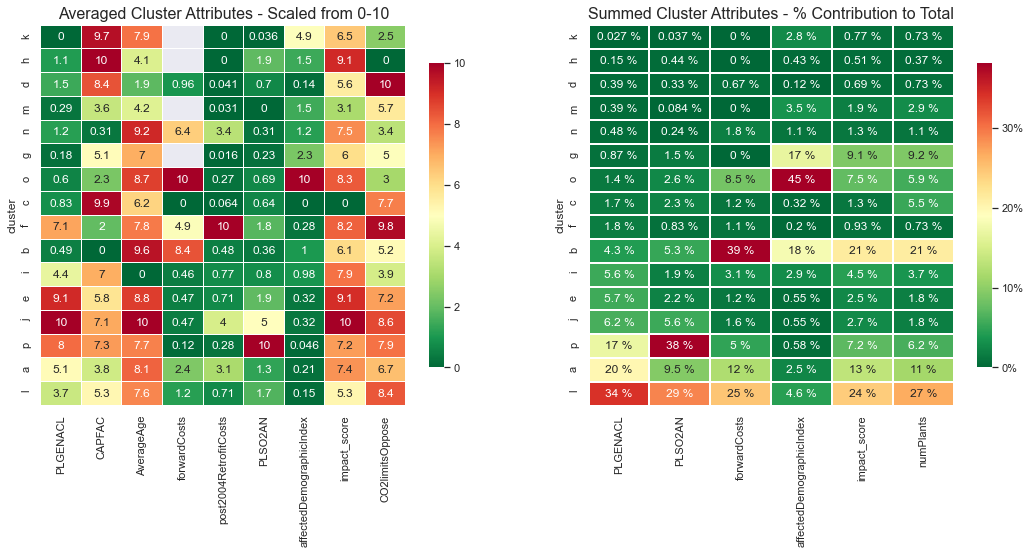

In [21]:
mapdf = (total.groupby('cluster')['PLGENACL', 'PLSO2AN', 'forwardCosts', 'affectedDemographicIndex', 'impact_score', 'numPlants'].sum()/alldf[['PLGENACL', 'PLSO2AN', 'forwardCosts', 'affectedDemographicIndex', 'impact_score', 'numPlants']].sum())*100
hmap1 = hmap_df_constructor(total)

order = mapdf.reset_index()[['cluster','PLGENACL']]
order['ord'] = order['PLGENACL']

hmap1 = hmap1.reset_index().merge(order[['cluster', 'ord']], on='cluster')
hmap1 = hmap1.sort_values('ord')
hmap1 = hmap1.set_index('cluster')
hmap1 = hmap1[['PLGENACL', 'CAPFAC', 'AverageAge',  'forwardCosts', 'post2004RetrofitCosts','PLSO2AN', 'affectedDemographicIndex',  'impact_score',  'CO2limitsOppose']]

sns.set(rc = {'figure.figsize':(18,7)})
#sns.set(font_scale=1)


fig, ax = plt.subplots(1,2)
sns.heatmap(hmap1*10, annot=True, robust=True, cmap = 'RdYlGn_r', ax=ax[0], linewidth=0.01, cbar_kws={"shrink": .8})
sns.heatmap(mapdf.sort_values('PLGENACL'), annot=True, robust=True, cmap = 'RdYlGn_r', ax=ax[1], linewidth=1, cbar_kws={"shrink": .8})

for t in ax[1].texts: t.set_text(t.get_text() + " %")

cbar = ax[1].collections[0].colorbar
cbar.set_ticks([0, 10, 20, 30, 40])
cbar.set_ticklabels(['0%', '10%', '20%', '30%', '40%'])

ax[0].set_title('Averaged Cluster Attributes - Scaled from 0-10',fontdict= { 'fontsize': 16})
ax[1].set_title('Summed Cluster Attributes - % Contribution to Total',fontdict= { 'fontsize': 16})



In [22]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=2,
    vertical_spacing=0.1,
    subplot_titles=("Summed Cluster Attributes - % Contribution to Total", "Averaged Cluster Attributes - Scaled from 0-10"),
    specs=[[{"type": "Heatmap"}, {"type": "Heatmap"}]]
    )

x1=['Annual Generation', 'Total SO2 Released', 'Forward Costs', 'Affected DAC within 3 Miles', 'Community Impact Score', 'Number of Plants']
y1 = mapdf.sort_values('PLGENACL').index.tolist()
z1 = mapdf.sort_values('PLGENACL').values.tolist()
tList1 = mapdf.sort_values('PLGENACL').round(2).values.tolist()

x2=['Annual Generation (MWh/yr)', 'Capacity Factor', 'Average Age',  'Forward Costs ($/MWh)', 'Post 2004 Retrofit Costs','Total SO2 (tons/yr)', 'Affected DAC within 3 Miles',  'Impact Score',  'Support for Coal Power']
y2 = hmap1.index.tolist()
z2 = hmap1.values.tolist()
tList2 = hmap1.round(2).values.tolist()

fig.add_trace(go.Heatmap(x=x1, y=y1, z=z1, colorscale = 'rdylgn_r', xgap = 2, ygap = 2,
text=tList1, texttemplate=("%{text}"+"%"), colorbar_x=0.45), row=1, col=1)

fig.add_trace(go.Heatmap(x=x2, y=y2, z=z2, colorscale = 'rdylgn_r', xgap = 2, ygap = 2,
text=tList2, texttemplate=("%{text}"),colorbar_x=1), row=1, col=2)

fig.update_xaxes(tickangle=45)

fig.update_layout(font=dict(
        #family="Courier New, monospace",
        size=10,
        #color="RebeccaPurple"
    ),
    width=1100,
    height=700,
    xaxis_title="Attribute",
    xaxis2_title="Attribute",
    yaxis_title="Cluster Label")


fig.show()

In [23]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=2,
    vertical_spacing=0.1,
    subplot_titles=("Summed Cluster Attributes - % Contribution to Total", "Averaged Cluster Attributes - Scaled from 0-1"),
    specs=[[{"type": "Heatmap"}, {"type": "Heatmap"}]]
    )

mapdf2 = mapdf.drop(['k', 'h', 'd', 'm', 'n', 'f'])
x1=['Annual Generation', 'Total SO2 Released', 'Forward Costs', 'Affected DAC within 3 Miles', 'Impact Score', 'Number of Plants']
y1 = mapdf2.sort_values('PLGENACL').index.tolist()
z1 = mapdf2.sort_values('PLGENACL').values.tolist()
tList1 = mapdf2.sort_values('PLGENACL').round(2).values.tolist()

hmap2 = hmap1.drop(['k', 'h', 'd', 'm', 'n', 'f'])
x2=['Annual Generation (MWh/yr)', 'Capacity Factor', 'Average Age',  'Forward Costs ($/MWh)', 'Post 2004 Retrofit Costs','Total SO2 (tons/yr)', 'Affected DAC within 3 Miles',  'Impact Score',  'Support for Coal Power']
y2 = hmap2.index.tolist()
z2 = hmap2.values.tolist()
tList2 = hmap2.round(2).values.tolist()

fig.add_trace(go.Heatmap(x=x1, y=y1, z=z1, colorscale = 'rdylgn_r', xgap = 2, ygap = 2,
text=tList1, texttemplate=("%{text}"+"%"), colorbar_x=0.45), row=1, col=1)

fig.add_trace(go.Heatmap(x=x2, y=y2, z=z2, colorscale = 'rdylgn_r', xgap = 2, ygap = 2,
text=tList2, texttemplate=("%{text}"),colorbar_x=1), row=1, col=2)

fig.update_xaxes(tickangle=45)

fig.update_layout(font=dict(
        #family="Courier New, monospace",
        size=10,
        #color="RebeccaPurple"
    ),
    width=1000,
    height=700,
    xaxis_title="Attribute",
    xaxis2_title="Attribute",
    yaxis_title="Cluster Label")



fig.show()

In [24]:
import plotly.io as pio
# pio.write_image(fig, 'smallHeatmap.pdf', width=1000, height=700)

In [39]:
fig = go.Figure()

s2df = total[total['cluster']=='p']
num = s2df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = s2df['LON'],
    lat = s2df['LAT'],
    text = s2df['label'],
    legendgroup="group5",  # this can be any string, not just "group"
    legendgrouptitle_text="Highest SO2 Emitters",
    name=f"Group P - {num} Plants",
    mode="markers",
    marker=dict(color="yellow", 
    line = dict(color = 'black', width = 1),
    size=(s2df['PLGENACL']/500000))
))

p2df = total[total['cluster']=='j']
num = p2df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = p2df['LON'],
    lat = p2df['LAT'],
    text = p2df['label'],
    legendgroup="group6",  # this can be any string, not just "group"
    legendgrouptitle_text="Large Env. Impacts, Pro-Coal Public Sentiment",
    name=f"Group J - {num} Plants",
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="navy", 
    line = dict(color = 'black', width = 1),
    size=(p2df['PLGENACL']/500000))
))

rdf1 = total[total['cluster']=='e']
num = rdf1['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf1['LON'],
    lat = rdf1['LAT'],
    text = rdf1['label'],
    legendgroup="group6",  # this can be any string, not just "group"
    legendgrouptitle_text="Large Env. Impacts, Pro-Coal Public Sentiment",
    name = f'Group E - {num} Plants',
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="aquamarine", 
    line = dict(color = 'black', width = 1),
    size=(rdf1['PLGENACL']/500000))
))

rdf1 = total[total['cluster']=='l']
num = rdf1['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf1['LON'],
    lat = rdf1['LAT'],
    text = rdf1['label'],
    legendgroup="group6",  # this can be any string, not just "group"
    legendgrouptitle_text="Widespread Environmental & Community Impacts",
    name = f'Group L - {num} Plants',
    mode="markers",
    marker_symbol='circle-dot',
    marker=dict(color="mediumturquoise", 
    line = dict(color = 'black', width = 1),
    size=(rdf1['PLGENACL']/500000))
))

rdf = total[total['cluster']=='a']
num = rdf['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf['LON'],
    lat = rdf['LAT'],
    text = rdf['label'],
    legendgroup="group6",  # this can be any string, not just "group"
    legendgrouptitle_text="Large Env. Impacts, Pro-Coal Public Sentiment",
    name = f'Group A - {num} Plants',
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="blue", 
    line = dict(color = 'white', width = 1),
    size=(rdf['PLGENACL']/500000))
))




########
# Scenario 2 PLANTS
########


########
# DAC PLANTS
########
rdf = total[total['cluster']=='o']
num = rdf['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf['LON'],
    lat = rdf['LAT'],
    text = rdf['label'],
    legendgroup="group1",  # this can be any string, not just "group"
    legendgrouptitle_text="High DAC & Community Impacts",
    name = f'Group O - {num} Plants',
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="pink", 
    line = dict(color = 'darkred', width = 1),
    size=(rdf['PLGENACL']/500000))
))

rdf1 = total[total['cluster']=='g']
num = rdf1['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf1['LON'],
    lat = rdf1['LAT'],
    text = rdf1['label'],
    legendgroup="group1",  # this can be any string, not just "group"
    legendgrouptitle_text="High DAC Impact Plants, Anti-Coal Public Sentiment",
    name = f'Group G - {num} Plants',
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="coral", 
    line = dict(color = 'red', width = 1),
    size=(rdf1['PLGENACL']/500000))
))

p1df = total[total['cluster']=='b']
num = p1df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = p1df['LON'],
    lat = p1df['LAT'],
    text = p1df['label'],
    legendgroup="group1",  # this can be any string, not just "group"
    legendgrouptitle_text="High DAC Impact Plants, Anti-Coal Public Sentiment",
    name=f"Group B - {num} Plants",
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="darkorange", 
    line = dict(color = 'firebrick', width = 1),
    size=(p1df['PLGENACL']/500000))
))

########
# Group C
########
s1df = total[total['cluster']=='c']
num = s1df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = s1df['LON'],
    lat = s1df['LAT'],
    text = s1df['label'],
    legendgroup="group2",  # this can be any string, not just "group"
    legendgrouptitle_text="Minimal DAC & Community Impacts",
    name=f"Group C - {num} Plants",
    mode="markers",
    marker_symbol='circle',
    opacity=1,
    marker=dict(color="darkgrey", 
    line = dict(color = 'black', width = 1),
    size=(s1df['PLGENACL']/500000))
))

########
# Group B
########

########
# Cluster I
########

p2df = total[total['cluster']=='i']
num = p2df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = p2df['LON'],
    lat = p2df['LAT'],
    text = p2df['label'],
    legendgroup="group4",  # this can be any string, not just "group"
    legendgrouptitle_text="Newer Plants, Anti-Coal Public Sentiment",
    name=f"Group I - {num} Plants",
    mode="markers",
    marker_symbol='circle-open-dot',
    marker=dict(color="green", 
    line = dict(color = 'green', width = 1),
    size=(p2df['PLGENACL']/500000))
))




########
# A, L, E
########

l2 = ['k', 'h', 'd', 'm', 'n', 'f']
p2df = total[total['cluster'].isin(l2)]
num = p2df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = p2df['LON'],
    lat = p2df['LAT'],
    text = p2df['label'],
    legendgroup="group7",  # this can be any string, not just "group"
    legendgrouptitle_text="<5% of Total in Any Criteria",
    name=f"Group K, H, D, M, N, F - {num} Plants",
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="grey", 
    line = dict(color = 'black', width = 1),
    size=(p2df['PLGENACL']/500000))
))

########
# MAKE MAP
########

fig.update_layout(
    width=1400,
    height = 700,
    title_text = 'USA Coal Plants - Sized by Annual Generation (MWh)',
    geo_scope='usa', # limite map scope to USA,
    legend=dict(groupclick='toggleitem', itemdoubleclick = 'toggleothers')
)

fig.show()

In [26]:
# fig.write_html("AAAAplotly.html")
# pio.write_image(fig, 'mapped.pdf', width=1400, height=700)

MIXED PLOT

In [27]:
duplicateDF = total.sort_values('ORISPL')

In [28]:
def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = np.log(data[col])
        data[col].replace([np.inf, -np.inf], 0, inplace=True)
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

funcTest = scale_data(duplicateDF, ['forwardCosts', 'popWithin3miles', 'CO2limitsOppose', 'PLGENACL', 'AverageAge', 'affectedDemographicIndex', 'PLSO2AN'], MinMaxScaler())


/Users/gathrid/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

/Users/gathrid/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



In [29]:
##MIXED PLOT
fig = make_subplots(
    rows=3, cols=4,
    vertical_spacing=0.2,
    specs=[[{}, {}, {}, {}],
           [{"type": "Heatmap", "colspan":2, "rowspan":2}, None, {"type": "Scattergeo", "colspan":2, "rowspan":2}, None],
           [None, None, None, None]],

    subplot_titles=("", "", "", '', "Summed Cluster Attributes - % Contribution to Total", "Coal Plant Locations")
)

fig['layout']['xaxis']['title']='Surrounding Population Score'
fig['layout']['xaxis2']['title']='Coal Power Support Score'
fig['layout']['xaxis3']['title']='Forward Costs Score'
fig['layout']['xaxis4']['title']='Annual Generation Score'
fig['layout']['yaxis']['title']='Number of Plants'

l2 = ['k', 'h', 'd', 'm', 'n', 'f']
p2df = funcTest[funcTest['cluster'].isin(l2)==False]
LR = p2df['cluster'].unique().tolist()

for i in range(0, len(LR)):
    d = funcTest[funcTest['cluster']==LR[i]]
    d['popWithin3miles'] = (d['popWithin3miles'])
    fig.add_trace(go.Histogram(x=(d['popWithin3miles']),
    legendgrouptitle_text="Plant Groups",
    legendgroup="1",  # this can be any string, not just "group"
   

    name = LR[i],

    xbins=dict( # bins used for histogram
        start=0,
        end=1.0,
        size=0.05
    ),

    marker=dict(color=px.colors.qualitative.Plotly[i]),

    ),row=1, col=1)

for i in range(0, len(LR)):
    d = funcTest[funcTest['cluster']==LR[i]]
    fig.add_trace(go.Histogram(x=(d['CO2limitsOppose']), name = LR[i],
    marker=dict(color=px.colors.qualitative.Plotly[i]),
    showlegend=False
    
    ),row=1, col=2)

for i in range(0, len(LR)):
    d = funcTest[funcTest['cluster']==LR[i]]
    fig.add_trace(go.Histogram(x=(d['forwardCosts']), name = LR[i],
    marker=dict(color=px.colors.qualitative.Plotly[i]),
    showlegend=False
    ),row=1, col=3)

for i in range(0, len(LR)):
    d = funcTest[funcTest['cluster']==LR[i]]
    fig.add_trace(go.Histogram(x=(d['PLGENACL']), name = LR[i],
    marker=dict(color=px.colors.qualitative.Plotly[i]),
    showlegend=False
    ),row=1, col=4)

# for i in range(0, len(LR)):
#     d = funcTest[funcTest['cluster']==LR[i]]
#     fig.add_trace(go.Histogram(x=(d['impact_score']), name = LR[i],
#     marker=dict(color=px.colors.qualitative.Plotly[i]),
#     


#     ),row=2, col=1)


fig.add_trace(go.Heatmap(x=x1, y=y1, z=z1, colorscale = 'rdylgn_r', xgap = 2, ygap = 2,
text=tList1, texttemplate=("%{text}"+"%"), showscale=False), row=2, col=1)

# fig.add_trace(go.Heatmap(x=x2, y=y2, z=z2, colorscale = 'rdylgn_r', xgap = 2, ygap = 2,
# text=tList2, texttemplate=("%{text}"),showscale=False), row=2, col=2)


s2df = total[total['cluster']=='p']
num = s2df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = s2df['LON'],
    lat = s2df['LAT'],
    text = s2df['label'],

    legendgrouptitle_text="Highest SO2 Emitters",
    legendgroup="2",  # this can be any string, not just "group"

    name=f"Group P - {num} Plants",
    mode="markers",
    marker=dict(color="yellow", 
    line = dict(color = 'black', width = 1),
    size=(s2df['PLGENACL']/700000))
), row=2, col=3)

p2df = total[total['cluster']=='j']
num = p2df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = p2df['LON'],
    lat = p2df['LAT'],
    text = p2df['label'],
    legendgroup="2",  # this can be any string, not just "group"
    #legendgrouptitle_text="Large Env. Impacts, Pro-Coal Public Sentiment",
    name=f"Group J - {num} Plants",
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="navy", 
    line = dict(color = 'black', width = 1),
    size=(p2df['PLGENACL']/700000))
), row=2, col=3)

rdf1 = total[total['cluster']=='e']
num = rdf1['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf1['LON'],
    lat = rdf1['LAT'],
    text = rdf1['label'],
    legendgroup="3",  # this can be any string, not just "group"
    name = f'Group E - {num} Plants',
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="aquamarine", 
    line = dict(color = 'black', width = 1),
    size=(rdf1['PLGENACL']/700000))
), row=2, col=3)

rdf1 = total[total['cluster']=='l']
num = rdf1['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf1['LON'],
    lat = rdf1['LAT'],
    text = rdf1['label'],
    legendgroup="3",  # this can be any string, not just "group"
    #legendgrouptitle_text="Widespread Environmental & Community Impacts",
    name = f'Group L - {num} Plants',
    mode="markers",
    marker_symbol='circle-dot',
    marker=dict(color="mediumturquoise", 
    line = dict(color = 'black', width = 1),
    size=(rdf1['PLGENACL']/700000))
), row=2, col=3)

rdf = total[total['cluster']=='a']
num = rdf['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf['LON'],
    lat = rdf['LAT'],
    text = rdf['label'],
    legendgroup="4",  # this can be any string, not just "group"
    #legendgrouptitle_text="Large Env. Impacts, Pro-Coal Public Sentiment",
    name = f'Group A - {num} Plants',
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="blue", 
    line = dict(color = 'white', width = 1),
    size=(rdf['PLGENACL']/700000))
), row=2, col=3)




########
# Scenario 2 PLANTS
########


########
# DAC PLANTS
########
rdf = total[total['cluster']=='o']
num = rdf['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf['LON'],
    lat = rdf['LAT'],
    text = rdf['label'],

    legendgroup="6",  # this can be any string, not just "group"
    legendgrouptitle_text="High DAC & Community Impacts",
    name = f'Group O - {num} Plants',
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="pink", 
    line = dict(color = 'darkred', width = 1),
    size=(rdf['PLGENACL']/700000))
), row=2, col=3)

rdf1 = total[total['cluster']=='g']
num = rdf1['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = rdf1['LON'],
    lat = rdf1['LAT'],
    text = rdf1['label'],

    legendgroup="6",  # this can be any string, not just "group"
    legendgrouptitle_text="High DAC Impact Plants, Anti-Coal Public Sentiment",
    name = f'Group G - {num} Plants',
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="coral", 
    line = dict(color = 'red', width = 1),
    size=(rdf1['PLGENACL']/700000))
), row=2, col=3)

p1df = total[total['cluster']=='b']
num = p1df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = p1df['LON'],
    lat = p1df['LAT'],
    text = p1df['label'],
    legendgroup="6",  # this can be any string, not just "group"
    legendgrouptitle_text="High DAC Impact Plants, Anti-Coal Public Sentiment",
    name=f"Group B - {num} Plants",
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="darkorange", 
    line = dict(color = 'firebrick', width = 1),
    size=(p1df['PLGENACL']/700000))
), row=2, col=3)

########
# Group C
########
s1df = total[total['cluster']=='c']
num = s1df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = s1df['LON'],
    lat = s1df['LAT'],
    text = s1df['label'],
    legendgroup="7",  # this can be any string, not just "group"
    legendgrouptitle_text="Minimal DAC & Community Impacts",
    name=f"Group C - {num} Plants",
    mode="markers",
    marker_symbol='circle',
    opacity=1,
    marker=dict(color="darkgrey", 
    line = dict(color = 'black', width = 1),
    size=(s1df['PLGENACL']/700000))
), row=2, col=3)

########
# Group B
########

########
# Cluster I
########

p2df = total[total['cluster']=='i']
num = p2df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = p2df['LON'],
    lat = p2df['LAT'],
    text = p2df['label'],
    legendgroup="8",  # this can be any string, not just "group"
    legendgrouptitle_text="Newer Plants, Anti-Coal Public Sentiment",
    name=f"Group I - {num} Plants",
    mode="markers",
    marker_symbol='circle-open-dot',
    marker=dict(color="green", 
    line = dict(color = 'green', width = 1),
    size=(p2df['PLGENACL']/700000))
), row=2, col=3)




########
# A, L, E
########

l2 = ['k', 'h', 'd', 'm', 'n', 'f']
p2df = total[total['cluster'].isin(l2)]
num = p2df['numPlants'].count()
fig.add_trace(go.Scattergeo(
    lon = p2df['LON'],
    lat = p2df['LAT'],
    text = p2df['label'],
    legendgroup="8",  # this can be any string, not just "group"
    legendgrouptitle_text="<5% of Total in Any Criteria",
    name=f"Group K, H, D, M, N, F - {num} Plants",
    mode="markers",
    marker_symbol='circle',
    marker=dict(color="grey", 
    line = dict(color = 'black', width = 1),
    size=(p2df['PLGENACL']/700000))
), row=2, col=3)

fig.update_layout(barmode='stack', bargap=0.22, 
legend_traceorder="normal",
    font=dict(
        #family="Courier New, monospace",
        size=10,
        #color="RebeccaPurple"
        ),
    width=1100,
    height = 800,
    geo_scope = 'usa',
)
    


#fig.update_xaxes(tickangle=45)

fig.show()

# marker=dict(color=px.colors.qualitative.Plotly[7], 
#         line = dict(color = 'black', width = .2),
#         size=np.log(p2df['PLGENACL'])**5/180000)

<ipython-input-29-072e75d74f5a>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
# pio.write_image(fig, 'comboFig.pdf')

NEW MIXED PLOT CREATION

In [31]:
spiderDF = hmap1
spiderDF = spiderDF[['PLGENACL', 'AverageAge', 'forwardCosts', 'PLSO2AN', 'affectedDemographicIndex',  'CO2limitsOppose']]

In [32]:
fig = go.Figure()

clusterList = [['p'], ['j', 'e', 'l', 'a'], ['g', 'o', 'b'], ['c'], ['i'], ['k', 'h', 'd', 'm', 'n', 'f']]

for grouping in range(0, len(clusterList)):
  spider = spiderDF.reset_index()
  spiderData = (spider[spider['cluster'].isin(clusterList[grouping])==True]).set_index('cluster')

  for i in reversed(range(0, len(spiderData))):
    fig.add_trace(go.Scatterpolar(
      r=list(spiderData.iloc[i]),
      theta=list(['Annual Generation', 'Average Age', 'Forward Costs', 'SO2 Emissions', 'Affected DAC within 3 miles', 'Public Support for Coal Power']),
      fill='toself', 
      legendgroup = grouping,

      opacity = 0.5+(i/10),
      name=spiderData.index[i]
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1],
      showticklabels=False
    ),
  ),
  showlegend=True,
  legend_title='Cluster'
)

fig.show()

In [33]:
scaledDF = total.sort_values('cluster')

In [34]:
def df_minMaxScaler(d, lister):
    for PLGENACL in lister:
        d[PLGENACL] = np.log(d[PLGENACL])
        d[PLGENACL].replace([np.inf, -np.inf], 0, inplace=True)
        d[PLGENACL] = MinMaxScaler().fit_transform(d[PLGENACL].values.reshape(-1, 1))
        #d[PLGENACL] = (d[PLGENACL]-d[PLGENACL].min())/(d[PLGENACL].max()-d[PLGENACL].min())
    return d

scaledDF = df_minMaxScaler(scaledDF, ['PLGENACL', 'AverageAge', 'forwardCosts', 'PLSO2AN', 'affectedDemographicIndex',  'CO2limitsOppose'])


/Users/gathrid/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

/Users/gathrid/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



In [35]:
fig1 = go.Figure()
for n in range(0, len(clusterList)):
    for i in range(0, len(clusterList[n])):
        visuals = scaledDF[scaledDF['cluster']==clusterList[n][i]]
        fig1.add_trace(go.Histogram(x=visuals['PLGENACL'], name=clusterList[n][i]))

fig1.update_layout(barmode='stack', bargap=0.22, xaxis_range = [-0.05,1.05])

In [36]:
def createDashboard(n):

    fig = make_subplots(
        rows=2, cols=5,
        vertical_spacing=0.3,
        specs=
            [[{}, {}, {}, {"type": "Scatterpolar", "colspan":2, "rowspan":2}, None],
            [{}, {}, {}, None, None]],
        #subplot_titles=("", "", "", "Average Cluster Traits")
    )

    traitList = ['PLGENACL', 'AverageAge', 'forwardCosts', 'affectedDemographicIndex', 'PLSO2AN', 'CO2limitsOppose']

    row1=1
    col1=1

    for trait in range(0, len(traitList)):
        if row1 == 3:
            row1 = 1
        if col1 == 4:
            col1 = 1
        if row1==1 and col1==1:
            var = True
        else:
            var = False

        for i in range(0, len(clusterList[n])):
                visuals = scaledDF[scaledDF['cluster']==clusterList[n][i]]
                fig.add_trace(go.Histogram(x=visuals[traitList[trait]], name= f"Group {clusterList[n][i]} - {visuals['numPlants'].count()} Plants", 
                showlegend=var,
                xbins=dict(start=0, end=1.0, size=0.05),
                marker=dict(color=px.colors.qualitative.Plotly_r[i])
                ),
                row=row1, col=col1)
        row1 +=1
        col1+=1

    for grouping in range(n, n+1):
        spider = spiderDF.reset_index()
        spiderData = (spider[spider['cluster'].isin(clusterList[grouping])==True]).set_index('cluster')

    for i in reversed(range(0, len(spiderData))):
        fig.add_trace(go.Scatterpolar(
        r=list(spiderData.iloc[i]),
        theta=list(['Annual Generation', 'Average Age', 'Forward Costs', 'SO2 Emissions', 'Affected DAC within 3 miles',  'Public Support for Coal Power']),
        fill='toself', 
        legendgroup = grouping,
        #opacity = 0.4+(i/5),
        showlegend=False,
        name=spiderData.index[i],
        marker=dict(color=px.colors.qualitative.Plotly_r[i], opacity = 1),
        #line=dict(color=px.colors.qualitative.Plotly_r[i]),
        ))

    fig['layout']['xaxis']['title']='Annual Generation Score'
    fig['layout']['xaxis2']['title']='Average Age Score'
    fig['layout']['xaxis3']['title']='Forward Costs Score'
    fig['layout']['xaxis4']['title']='Affected DAC within 3 miles Score'
    fig['layout']['xaxis5']['title']='SO2 Emissions Score'
    fig['layout']['xaxis6']['title']='Public Support for Coal Score'
    fig['layout']['yaxis']['title']='Number of Plants'
    fig['layout']['yaxis4']['title']='Number of Plants'

    fig.update_layout(barmode='stack', legend={'traceorder':'reversed'}, bargap=0.1, xaxis1_range = [-0.05,1.05], xaxis2_range = [-0.05,1.05], xaxis3_range = [-0.05,1.05],
    xaxis4_range = [-0.05,1.05], xaxis5_range = [-0.05,1.05], xaxis6_range = [-0.05,1.05],
        polar=dict(radialaxis=dict(visible=True,range=[0, 1],showticklabels=False)),
        title={
            'text': "Average Cluster Traits",
            'y':0.08,
            'x':0.78,
            'xanchor': 'right',
            'yanchor': 'bottom'},
    width=1500,
    height = 500,

    )
    return fig


In [37]:
fig = createDashboard(1)
fig

In [38]:
fig = go.Figure()

fig = make_subplots(
    rows=2, cols=5,
    vertical_spacing=0.3,
    specs=
        [[{}, {}, {}, {"type": "Scatterpolar", "colspan":2, "rowspan":2}, None], 
        [{}, {}, {}, None, None],
        ],
    #subplot_titles=("", "", "", "Average Cluster Traits")
)

traitList = ['PLGENACL', 'AverageAge', 'forwardCosts', 'affectedDemographicIndex', 'PLSO2AN', 'CO2limitsOppose']
clusterList = [['p'], ['j', 'e', 'l', 'a'], ['g', 'o', 'b'], ['c'], ['i'], ['k', 'h', 'd', 'm', 'n', 'f']]

num=1

for i in clusterList[num]:
    fig.add_trace(go.Violin(x=total[total['cluster']==i]['PLGENACL'], name = i, marker=dict(color=px.colors.qualitative.Plotly_r[clusterList[num].index(i)]), ), row=1, col=1)
for i in clusterList[num]:
    fig.add_trace(go.Violin(x=total[total['cluster']==i]['AverageAge'], name = i, marker=dict(color=px.colors.qualitative.Plotly_r[clusterList[num].index(i)]), showlegend=False), row=1, col=2)
for i in clusterList[num]:
    fig.add_trace(go.Violin(x=total[total['cluster']==i]['forwardCosts'], name = i, marker=dict(color=px.colors.qualitative.Plotly_r[clusterList[num].index(i)]), showlegend=False), row=1, col=3)
for i in clusterList[num]:
    fig.add_trace(go.Violin(x=total[total['cluster']==i]['affectedDemographicIndex'], name = i, marker=dict(color=px.colors.qualitative.Plotly_r[clusterList[num].index(i)]), showlegend=False), row=2, col=1)
for i in clusterList[num]:
    fig.add_trace(go.Violin(x=total[total['cluster']==i]['PLSO2AN'], name = i, marker=dict(color=px.colors.qualitative.Plotly_r[clusterList[num].index(i)]), showlegend=False), row=2, col=2)
for i in clusterList[num]:
    fig.add_trace(go.Violin(x=total[total['cluster']==i]['CO2limitsOppose'], name = i, marker=dict(color=px.colors.qualitative.Plotly_r[clusterList[num].index(i)]), showlegend=False), row=2, col=3)

fig['layout']['xaxis']['title']='Annual Generation Score'
fig['layout']['xaxis2']['title']='Average Age Score'
fig['layout']['xaxis3']['title']='Forward Costs Score'
fig['layout']['xaxis4']['title']='Affected DAC within 3 miles Score'
fig['layout']['xaxis5']['title']='SO2 Emissions Score'
fig['layout']['xaxis6']['title']='Public Support for Coal Score'


fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(violinmode='overlay', xaxis1_range = [-2500000,20000000], xaxis2_range = [-10,100], xaxis3_range = [-10,550], xaxis4_range = [-2000000,10000000], 
xaxis5_range = [-2500,20000], xaxis6_range = [10,90])

In [ ]:
clusterList[1]

['j', 'e', 'l', 'a']

In [ ]:
temps = total.groupby('cluster').mean()
temps['impact_score']*temps['PLGENACL']/1000000000

In [39]:
from plotly.subplots import make_subplots

df = total.groupby('cluster').mean().reset_index()

df2 = total.groupby('cluster')['PLGENACL', 'PLSO2AN', 'affectedDemographicIndex'].sum()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df2 = pd.concat((df2, df.cluster), 1).set_index('cluster')
df2 = df2.reset_index()

fig = make_subplots(
    rows=1, cols=2,
    vertical_spacing=0.1,
    subplot_titles=("Cluster Impact Scale", "Cluster Impacts"),
    specs=[[{"type": "Barpolar"}, {"type": "Barpolar"}]]
    )

fig.add_trace(go.Barpolar(
    r = list(df['pop_level']),
    theta=list(df['cluster']),
    name = 'Affected Population Score',
    marker_color='rgb(46,109,255)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7   
),
row = 1, col = 2)
fig.add_trace(go.Barpolar(
    r = list(df['CAP_level']),
    theta=list(df['cluster']),
    name = 'Criteria Air Pollutant Score',
    marker_color='rgb(139,222,52)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
),
row = 1, col = 2)



fig.add_trace(go.Barpolar(    
    r = list(df['forwardCosts']),
    theta=list(df['cluster']),
    name = 'Forward Costs',
    marker_color='rgb(245,94,21)', 
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
),
row = 1, col = 2)

fig.add_trace(go.Barpolar(
    r = list(df2['PLGENACL']),
    theta=list(df2['cluster']),
    name = 'Total Generation (MWh/yr)',
    marker_color='red',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7   
),
row = 1, col = 1)

fig.add_trace(go.Barpolar(
    r = list(df2['PLSO2AN']),
    theta=list(df2['cluster']),
    name = 'Total SO2 Released (tons/yr)',
    marker_color='yellow',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
),
row = 1, col = 1)

fig.add_trace(go.Barpolar(    
    r = list(df2['affectedDemographicIndex']),
    theta=list(df2['cluster']),
    name = 'Total DAC Affected',
    marker_color='maroon', 
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
),
row = 1, col = 1)

fig.update_layout(
    title='Plant Cluster Analysis',
    font_size=12,
    legend_font_size=15,
    polar = dict(
        radialaxis = dict( showticklabels=False, ticks=''),
        angularaxis = dict(showticklabels=True, ticks=''))
)


for annotation in fig['layout']['annotations']: 
    annotation['textangle']=-90
    annotation['yshift']=-200
    annotation['xshift']=-170
    

fig.show()

<ipython-input-39-13e8810c7b6d>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [40]:
counter = 0

tempDF = (total.groupby('cluster')['PLGENACL', 'PLSO2AN', 'affectedDemographicIndex', 'impact_score', 'forwardCosts', 'numPlants'].sum()/alldf[['PLGENACL', 'PLSO2AN', 'affectedDemographicIndex', 'impact_score', 'forwardCosts', 'numPlants']].sum())*100
tempDF = tempDF[['PLGENACL', 'numPlants']]
tempDF = tempDF.rename(columns={'PLGENACL': 'gen'})
bulletdf = hmap_df_constructor(total)*10
bulletdf = bulletdf.merge(tempDF, left_index=True, right_index=True)

df = bulletdf
scaler = MinMaxScaler()   
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
bulletdf = pd.concat((df, tempDF.reset_index().cluster), 1).set_index('cluster')*10

fig = go.Figure()
fig.update_layout(height = 1000)
for i in reversed(range(0,len(bulletdf))):
    fig.add_trace(go.Indicator(
        mode = "number+gauge+delta",
        title = {'text': (bulletdf.reset_index()['cluster'][i])},
        value = bulletdf['impact_score'][i], ## GREEN BAR
        delta = {'reference': bulletdf['affectedDemographicIndex'][i]}, ## NUM ON LEFT
        domain = {'x': [0, 1], 'y': [counter, counter+0.04]},
        gauge = {
            'shape': "bullet",
            'axis': {'range': [None, 10]},
            'threshold': { 
                'line': {'color': "red", 'width': 2},
                'thickness': 0.75,
                'value': bulletdf['gen'][i]}, ## RED LINE VALUE
            'steps': [
                {'range': [0, bulletdf['PLGENACL'][i]], 'color': "lightgray"}, ##GREY BAR
                {'range': [100, 100], 'color': "gray"}]}))
    counter = counter + 0.06
fig

<ipython-input-40-82b7f15163c1>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [41]:
scores = total.groupby('cluster').mean()
def equalize(df, col:str):
    df[col] = (df[col]/df[col].mean())*100
    return df

scores = equalize(scores, 'PLGENACL')
scores = equalize(scores, 'forwardCosts')

groupings = (scores['PLGENACL']*scores['forwardCosts']*scores['pop_level']*scores['CAP_level']).dropna().reset_index()
groupings.rename( columns={0 :'g_score'}, inplace=True )

temp = (total[['impact_score', 'cluster']].groupby('cluster').mean().reset_index())
groupings = groupings.merge(temp, on='cluster')

In [42]:
testerdf = total
testerdf['g_score'] = testerdf['PLGENACL']*testerdf['forwardCosts']*testerdf['pop_level']*testerdf['CAP_level'].dropna()

In [43]:

px.scatter(testerdf, x="g_score", y='impact_score', hover_name='cluster', color='cluster', size='PLNGENAN')

In [44]:
px.histogram(groupings, x="g_score", nbins=5, hover_data=['cluster'], hover_name='cluster')


In [45]:
px.scatter(groupings, x="g_score", y='g_score', hover_name='cluster')

In [46]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=("Cluster Totals", "Cluster Averages", "SUB-Cluster Totals", "SUB-Cluster Averages"),
vertical_spacing=0.07,
horizontal_spacing=0,
column_widths=[0.2, 0.2], 
specs=
    [[{"type": "Barpolar"}, {"type": "Barpolar"}],
    [{"type": "Barpolar"}, {"type": "Barpolar"}]])

df = total
df['cost_level'] = (df['forwardCosts'])
df['cost_level'] = (df['cost_level'])/(df['cost_level'].mean())*100

df_sum = df[df['p_num']<90].groupby('cluster').sum().reset_index()
df_mean = df[df['p_num']<90].groupby('cluster').mean().reset_index()

df_sum2 = df[df['p_num']>90].groupby('cluster').sum().reset_index()
df_mean2 = df[df['p_num']>90].groupby('cluster').mean().reset_index()


fig.add_trace(go.Barpolar(    
    r = list(df_sum['cost_level']),
    theta=list(df_sum['cluster']),
    name = 'Cost Score',
    marker_color='rgb(245,94,21)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7),
row=1, col=1  
)
fig.add_trace(go.Barpolar(
    r = list(df_sum['CAP_level']),
    theta=list(df_sum['cluster']),
    name = 'Criteria Air Pollutant Score',
    marker_color='rgb(46,109,255)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7),
row=1, col=1   
)
fig.add_trace(go.Barpolar(
    r = list(df_sum['pop_level']),
    theta=list(df_sum['cluster']),
    name = 'Impacted Population Score',
    marker_color='rgb(139,222,52)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7),
row=1, col=1 
)


fig.add_trace(go.Barpolar(    
    r = list(df_mean['cost_level']),
    theta=list(df_mean['cluster']),
    name = 'Cost Score',
    marker_color='rgb(245,94,21)',
    marker_line_color="black",
    hoverinfo = ['all'],
    showlegend=False,
    opacity=0.7),
row=1, col=2  
)
fig.add_trace(go.Barpolar(
    r = list(df_mean['CAP_level']),
    theta=list(df_mean['cluster']),
    name = 'Criteria Air Pollutant Score',
    marker_color='rgb(46,109,255)',
    marker_line_color="black",
    hoverinfo = ['all'],
    showlegend=False,
    opacity=0.7),
row=1, col=2   
)
fig.add_trace(go.Barpolar(
    r = list(df_mean['pop_level']),
    theta=list(df_mean['cluster']),
    name = 'Impacted Population Score',
    marker_color='rgb(139,222,52)',
    marker_line_color="black",
    hoverinfo = ['all'],
    showlegend=False,
    opacity=0.7),
row=1, col=2 
)


########
##sub-cl
########
fig.add_trace(go.Barpolar(    
    r = list(df_sum2['cost_level']),
    theta=list(df_sum2['cluster']),
    name = 'Cost Score',
    marker_color='rgb(245,94,21)',
    marker_line_color="black",
    hoverinfo = ['all'],
    showlegend=False,
    opacity=0.7),
row=2, col=1  
)
fig.add_trace(go.Barpolar(
    r = list(df_sum2['CAP_level']),
    theta=list(df_sum2['cluster']),
    name = 'Criteria Air Pollutant Score',
    marker_color='rgb(46,109,255)',
    marker_line_color="black",
    hoverinfo = ['all'],
    showlegend=False,
    opacity=0.7),
row=2, col=1   
)
fig.add_trace(go.Barpolar(
    r = list(df_sum2['pop_level']),
    theta=list(df_sum2['cluster']),
    name = 'Impacted Population Score',
    marker_color='rgb(139,222,52)',
    marker_line_color="black",
    hoverinfo = ['all'],
    showlegend=False,
    opacity=0.7),
row=2, col=1 
)


fig.add_trace(go.Barpolar(    
    r = list(df_mean2['cost_level']),
    theta=list(df_mean2['cluster']),
    name = 'Cost Score',
    marker_color='rgb(245,94,21)',
    marker_line_color="black",
    hoverinfo = ['all'],
    showlegend=False,
    opacity=0.7),
row=2, col=2  
)
fig.add_trace(go.Barpolar(
    r = list(df_mean2['CAP_level']),
    theta=list(df_mean2['cluster']),
    name = 'Criteria Air Pollutant Score',
    marker_color='rgb(46,109,255)',
    marker_line_color="black",
    hoverinfo = ['all'],
    showlegend=False,
    opacity=0.7),
row=2, col=2   
)
fig.add_trace(go.Barpolar(
    r = list(df_mean2['pop_level']),
    theta=list(df_mean2['cluster']),
    name = 'Impacted Population Score',
    marker_color='rgb(139,222,52)',
    marker_line_color="black",
    hoverinfo = ['all'],
    showlegend=False,
    opacity=0.7),
row=2, col=2 
)



fig.update_layout( 
title='Total Cluster Impacts vs Average Cluster Impacts',
font_size=12,
legend_font_size=15,

#polar_angularaxis_rotation=90,
#width=900,
height=900)

for annotation in fig['layout']['annotations']: 
        annotation['textangle']=-90
        annotation['yshift']=-260
        annotation['xshift']=-230

fig.show()

In [47]:
def superC(id):
    if id == 'f' or id == 'j':
        return 1
    if id == 'e':
        return 2
    if id == 'a' or id == 'i' or id == 'p':
        return 3
    if id == 'l' or id == 'n' or id == 'o'  or id == 'd' or id == 'b' or id == 'c':
        return 4
    if id == 'g' or id == 'h' or id == 'j'  or id == 'k' or id == 'm':
        return 5


total['superCluster'] = total['cluster'].apply(superC)

In [48]:
import plotly.express as px



fig2 = px.scatter(data_frame=total,
y = 'pop_level', 
x = 'CAP_level', 
color =total['superCluster'].astype(str),
color_discrete_sequence=px.colors.qualitative.Set1,
size='PLGENACL', 
hover_name = 'label',
#facet_col="scenario",
#marginal_x="histogram", marginal_y="histogram",
title="Coal Powerplant Impact Score"
)
fig2


<ipython-input-49-a5df59a62b61>:10: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Summed Cluster Attributes - % Contribution to Total')

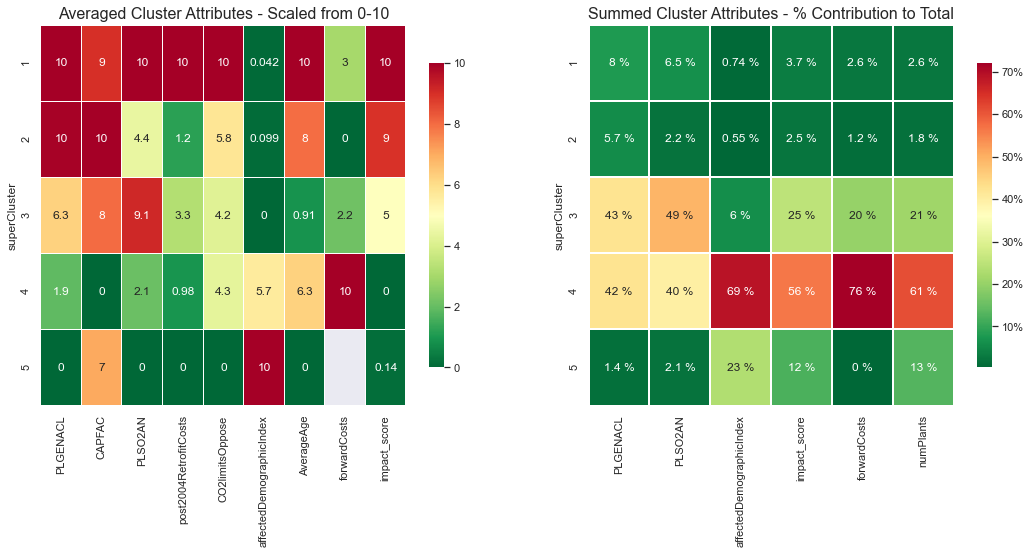

In [49]:
def Shmap_df_constructor(total2): 
    scaler = MinMaxScaler()   
    hmap2 = total2.groupby('superCluster').mean()[['PLGENACL', 'CAPFAC', 'PLSO2AN', 'post2004RetrofitCosts', 'CO2limitsOppose', 'affectedDemographicIndex', 'AverageAge', 'forwardCosts', 'impact_score']].reset_index()
    df = hmap2
    df = df.drop('superCluster', axis=1)
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    hmap2 = pd.concat((df, hmap2.superCluster), 1).set_index('superCluster')
    return hmap2

mapdfS = (total.groupby('superCluster')['PLGENACL', 'PLSO2AN', 'affectedDemographicIndex', 'impact_score', 'forwardCosts', 'numPlants'].sum()/total[['PLGENACL', 'PLSO2AN', 'affectedDemographicIndex', 'impact_score', 'forwardCosts', 'numPlants']].sum())*100
hmap1S = Shmap_df_constructor(total)

sns.set(rc = {'figure.figsize':(18,7)})
#sns.set(font_scale=1)


fig, ax = plt.subplots(1,2)
sns.heatmap(hmap1S*10, annot=True, robust=True, cmap = 'RdYlGn_r', ax=ax[0], linewidth=0.01, cbar_kws={"shrink": .8})
sns.heatmap(mapdfS, annot=True, robust=True, cmap = 'RdYlGn_r', ax=ax[1], linewidth=1, cbar_kws={"shrink": .8})

for t in ax[1].texts: t.set_text(t.get_text() + " %")

cbar = ax[1].collections[0].colorbar
cbar.set_ticks([0, 10, 20, 30, 40, 50, 60, 70])
cbar.set_ticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%'])

ax[0].set_title('Averaged Cluster Attributes - Scaled from 0-10',fontdict= { 'fontsize': 16})
ax[1].set_title('Summed Cluster Attributes - % Contribution to Total',fontdict= { 'fontsize': 16})
